<a href="https://colab.research.google.com/github/VWTZLS/First-Year-Project/blob/main/Binary_Logistic_Regression_Weighted_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.feature_selection import f_regression
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#2019/2020

In [21]:
df = pd.read_excel('Student grades 2019_2020.xlsx', 
                   dtype = {"Gender": str,
                            "Grade": float})
Gender = df["Gender"]
Grade = df['FINAL GRADE']

GenderNP = Gender.to_numpy(dtype=None, copy=False)
GradeVar = Grade.to_numpy(dtype=None, copy=False)

GenderVar = np.zeros(GenderNP.size)
for i in range(GenderNP.size):
  if GenderNP[i] == 'M':
    GenderVar[i] = int(0)
  elif GenderNP[i] == 'F':
    GenderVar[i] = int(1)

def logit_pvalue(model, x):
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

model = LogisticRegression(C=1e30,class_weight='balanced')
GradeVar = GradeVar.reshape(-1,1)
model = model.fit(GradeVar, GenderVar)
print('The p-values is:',logit_pvalue(model, GradeVar))

The p-values is: [0.25821857 0.22835053]


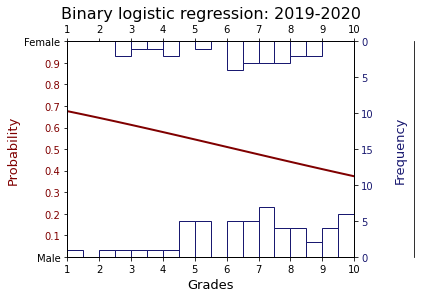

In [22]:
# Preparation plot

male = pd.read_excel('Male 19_20.xlsx', 
                   dtype = {"Male": float})
female = pd.read_excel('Female 19_20.xlsx', 
                   dtype = {"Female": float})


malen = male.to_numpy(dtype=None, copy=False)
femalen = female.to_numpy(dtype=None, copy=False)

X = np.arange(1.0, 10.5, 0.5)
Xs2 = list(X)
Y = [model.predict_proba([[GradeVar]])[0][1] for GradeVar in Xs2]

# Plot

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.set_xlim(1, 10)
ax1.set_ylim(0, 1)
ax1.set_yticks(np.arange(0, 1.1, 0.1))

tickcolors = ['black','maroon','maroon','maroon','maroon','maroon','maroon','maroon','maroon','maroon','black']
ax1.set_yticklabels(['Male', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 'Female'])

for ticklabel, tickcolor in zip(ax1.get_yticklabels(), tickcolors):
    ticklabel.set_color(tickcolor)

ax2.set_ylim(0, 30)
ax3.set_ylim(0, 30)
    
ax1.set_xlabel("Grades",fontsize=13)
ax1.set_ylabel("Probability",color='maroon',fontsize=13)
ax2.set_ylabel("Frequency",color='midnightblue',fontsize=13, labelpad=20)

ax1.plot(X, Y, color='maroon', label="Density", linewidth=2)
ax2.hist(malen, color='white', label="Male", histtype='bar',ec='midnightblue',bins=X)
ax3.hist(femalen, color='white', label="Female", histtype='bar',ec='midnightblue',bins=X)

ax3.spines['right'].set_position(('outward', 60))
ax3.invert_yaxis()

ax2.set_yticklabels([0, 5, 10, 15, 10, 5, 0],color='midnightblue')
ax3.axes.get_yaxis().set_visible(False)
ax4 = ax1.twiny()
ax4.set_xlim(1, 10)

fig.tight_layout()
plt.title('Binary logistic regression: 2019-2020',size=16, y=1.12)

plt.savefig('Plot1920' + '.pdf', bbox_inches='tight')

#2020/2021

In [23]:
df = pd.read_excel('Student grades 2020_2021.xlsx', 
                   dtype = {"Gender": str,
                            "Grade": float})
Gender = df["Gender"]
Grade = df['FINAL GRADE']

GenderNP = Gender.to_numpy(dtype=None, copy=False)
GradeVar = Grade.to_numpy(dtype=None, copy=False)

GenderVar = np.zeros(GenderNP.size)
for i in range(GenderNP.size):
  if GenderNP[i] == 'M':
    GenderVar[i] = int(0)
  elif GenderNP[i] == 'F':
    GenderVar[i] = int(1)
    
def logit_pvalue(model, x):
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

model = LogisticRegression(C=1e30,class_weight='balanced')
GradeVar = GradeVar.reshape(-1,1)
model = model.fit(GradeVar, GenderVar)
print('The p-value is:',logit_pvalue(model, GradeVar))

The p-value is: [0.72666908 0.71786226]


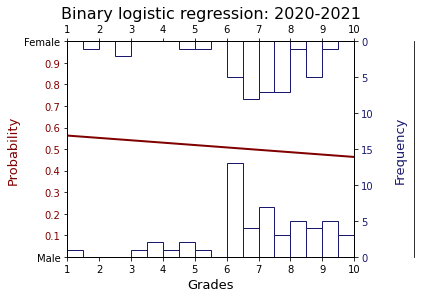

In [24]:
# Preparation plot

male = pd.read_excel('Male 20_21.xlsx', 
                   dtype = {"Male": float})
female = pd.read_excel('Female 20_21.xlsx', 
                   dtype = {"Female": float})


malen = male.to_numpy(dtype=None, copy=False)
femalen = female.to_numpy(dtype=None, copy=False)

X = np.arange(1.0, 10.5, 0.5)
Xs2 = list(X)
Y = [model.predict_proba([[GradeVar]])[0][1] for GradeVar in Xs2]

# Plot

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.set_xlim(1, 10)
ax1.set_ylim(0, 1)
ax1.set_yticks(np.arange(0, 1.1, 0.1))

tickcolors = ['black','maroon','maroon','maroon','maroon','maroon','maroon','maroon','maroon','maroon','black']
ax1.set_yticklabels(['Male', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 'Female'])

for ticklabel, tickcolor in zip(ax1.get_yticklabels(), tickcolors):
    ticklabel.set_color(tickcolor)

ax2.set_ylim(0, 30)
ax3.set_ylim(0, 30)
    
ax1.set_xlabel("Grades",fontsize=13)
ax1.set_ylabel("Probability",color='maroon',fontsize=13)
ax2.set_ylabel("Frequency",color='midnightblue',fontsize=13, labelpad=20)

ax1.plot(X, Y, color='maroon', label="Density", linewidth=2)
ax2.hist(malen, color='white', label="Male", histtype='bar',ec='midnightblue',bins=X)
ax3.hist(femalen, color='white', label="Female", histtype='bar',ec='midnightblue',bins=X)

ax3.spines['right'].set_position(('outward', 60))
ax3.invert_yaxis()

ax2.set_yticklabels([0, 5, 10, 15, 10, 5, 0],color='midnightblue')
ax3.axes.get_yaxis().set_visible(False)
ax4 = ax1.twiny()
ax4.set_xlim(1, 10)

fig.tight_layout()
plt.title('Binary logistic regression: 2020-2021',size=16, y=1.12)

plt.savefig('Plot2021' + '.pdf', bbox_inches='tight')

#2021/2022

In [2]:
df = pd.read_excel('Student grades 2021_2022.xlsx', 
                   dtype = {"Gender": str,
                            "Grade": float})
Gender = df["Gender"]
Grade = df['Final Grade']

GenderNP = Gender.to_numpy(dtype=None, copy=False)
GradeVar = Grade.to_numpy(dtype=None, copy=False)

GenderVar = np.zeros(GenderNP.size)
for i in range(GenderNP.size):
  if GenderNP[i] == 'M':
    GenderVar[i] = int(0)
  elif GenderNP[i] == 'F':
    GenderVar[i] = int(1)

def logit_pvalue(model, x):
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

model = LogisticRegression(C=1e30,class_weight='balanced')
GradeVar = GradeVar.reshape(-1,1)
model = model.fit(GradeVar, GenderVar)
print('The p-value is:',logit_pvalue(model, GradeVar))

The p-value is: [0.4309239  0.42122291]


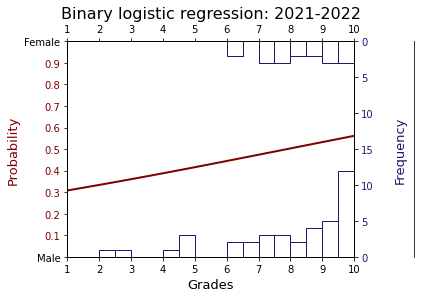

In [19]:
# Preparation plot

male = pd.read_excel('Male 21_22.xlsx', 
                   dtype = {"Male": float})
female = pd.read_excel('Female 21_22.xlsx', 
                   dtype = {"Female": float})


malen = male.to_numpy(dtype=None, copy=False)
femalen = female.to_numpy(dtype=None, copy=False)

X = np.arange(1.0, 10.5, 0.5)
Xs2 = list(X)
Y = [model.predict_proba([[GradeVar]])[0][1] for GradeVar in Xs2]

# Plot

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.set_xlim(1, 10)
ax1.set_ylim(0, 1)
ax1.set_yticks(np.arange(0, 1.1, 0.1))

tickcolors = ['black','maroon','maroon','maroon','maroon','maroon','maroon','maroon','maroon','maroon','black']
ax1.set_yticklabels(['Male', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 'Female'])

for ticklabel, tickcolor in zip(ax1.get_yticklabels(), tickcolors):
    ticklabel.set_color(tickcolor)

ax2.set_ylim(0, 30)
ax3.set_ylim(0, 30)
    
ax1.set_xlabel("Grades",fontsize=13)
ax1.set_ylabel("Probability",color='maroon',fontsize=13)
ax2.set_ylabel("Frequency",color='midnightblue',fontsize=13, labelpad=20)


ax1.plot(X, Y, color='maroon', label="Density", linewidth=2)
ax2.hist(malen, color='white', label="Male", histtype='bar',ec='midnightblue',bins=X)
ax3.hist(femalen, color='white', label="Female", histtype='bar',ec='midnightblue',bins=X)

ax3.spines['right'].set_position(('outward', 60))
ax3.invert_yaxis()

ax2.set_yticklabels([0, 5, 10, 15, 10, 5, 0],color='midnightblue')
ax3.axes.get_yaxis().set_visible(False)
ax4 = ax1.twiny()
ax4.set_xlim(1, 10)

fig.tight_layout()
plt.title('Binary logistic regression: 2021-2022',size=16, y=1.12)

plt.savefig('Plot2122' + '.pdf', bbox_inches='tight')